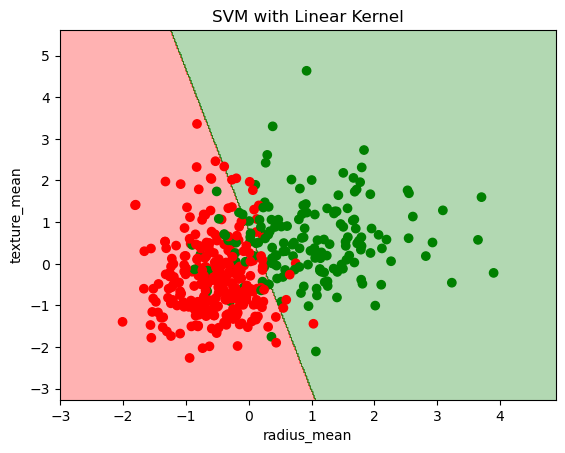

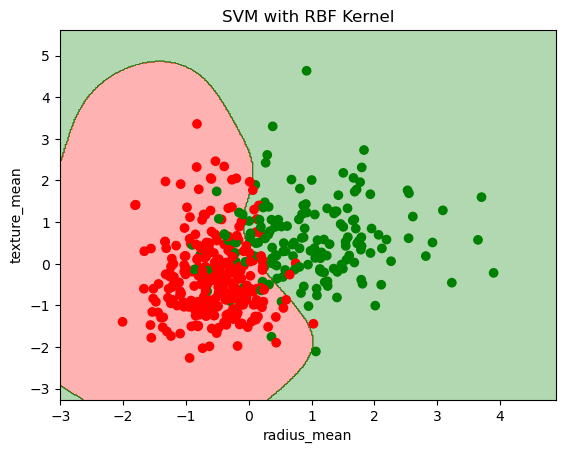

Mean CV Accuracy: 0.9011
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92        72
           1       0.94      0.74      0.83        42

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114

Confusion Matrix:
 [[70  2]
 [11 31]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

df = pd.read_csv(r"C:\Users\Aakash\Downloads\breast cancer.csv")
df = df.drop(columns=["id"])
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # M=1, B=0

features = ["radius_mean", "texture_mean"]
X = df[features].values
y = df["diagnosis"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green']))
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_train_scaled, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM with RBF Kernel")

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

y_pred = best_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
